In [ ]:
!pip install pystan==2.19
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 34.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.0.0-cp38-cp38-linux_x86_64.whl size=58397508 sha256=c9c1642d41e8734dd0707de09ed367a2c7f812dc31b8be5d404c1b939ba60f3e
  Stored in directory: /root/.cache/pip/wheels/92/af/46/7a021b32f4f0dec5d0a7b669e13b95a40a62ce007ac1039442
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6383306 sha256=875f1ea73794b1f

In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
import plotly.io as pio
pio.renderers.default='colab'

In [ ]:
df = pd.read_csv("/content/Tesla.csv - Tesla.csv.csv")
df
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.line(df, x="Date", y="Volume")

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.bar(df, y="Volume")

In [ ]:
px.box(df, y="Close")

In [ ]:
df

In [ ]:
columns = ['Date', "Close"]
ndf = pd.DataFrame(df, columns = columns)

In [ ]:
ndf

,Date,Close
0,6/29/2010,23.889999
1,6/30/2010,23.830000
2,7/1/2010,21.959999
3,7/2/2010,19.200001
4,7/6/2010,16.110001
...,...,...
1687,3/13/2017,246.169998
1688,3/14/2017,258.000000
1689,3/15/2017,255.729996
1690,3/16/2017,262.049988


In [ ]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-29,18.263507,1.952594,46.688412,18.263507,18.263507,6.136995,6.136995,6.136995,-0.918177,-0.918177,-0.918177,7.055173,7.055173,7.055173,0.0,0.0,0.0,24.400503
1,2010-06-30,18.307120,3.342693,47.800580,18.307120,18.307120,6.190991,6.190991,6.190991,-1.027745,-1.027745,-1.027745,7.218736,7.218736,7.218736,0.0,0.0,0.0,24.498111
2,2010-07-01,18.350734,1.675296,48.111576,18.350734,18.350734,6.272375,6.272375,6.272375,-1.085003,-1.085003,-1.085003,7.357377,7.357377,7.357377,0.0,0.0,0.0,24.623108
3,2010-07-02,18.394347,2.372507,49.205208,18.394347,18.394347,6.174733,6.174733,6.174733,-1.295037,-1.295037,-1.295037,7.469770,7.469770,7.469770,0.0,0.0,0.0,24.569079
4,2010-07-06,18.568799,1.167053,46.636436,18.568799,18.568799,6.737015,6.737015,6.737015,-0.918177,-0.918177,-0.918177,7.655192,7.655192,7.655192,0.0,0.0,0.0,25.305814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,2017-04-12,220.034488,191.963279,238.295697,219.992809,220.140361,-3.364810,-3.364810,-3.364810,-1.027745,-1.027745,-1.027745,-2.337065,-2.337065,-2.337065,0.0,0.0,0.0,216.669678
1718,2017-04-13,220.022111,193.583326,238.454137,219.955165,220.141909,-3.134855,-3.134855,-3.134855,-1.085003,-1.085003,-1.085003,-2.049852,-2.049852,-2.049852,0.0,0.0,0.0,216.887257
1719,2017-04-14,220.009734,193.368362,241.107999,219.927522,220.149357,-3.093732,-3.093732,-3.093732,-1.295037,-1.295037,-1.295037,-1.798695,-1.798695,-1.798695,0.0,0.0,0.0,216.916002
1720,2017-04-15,219.997358,198.124362,243.890155,219.883234,220.147663,1.184194,1.184194,1.184194,2.773729,2.773729,2.773729,-1.589535,-1.589535,-1.589535,0.0,0.0,0.0,221.181551


In [ ]:
px.line(forecast,x='ds',y='yhat')

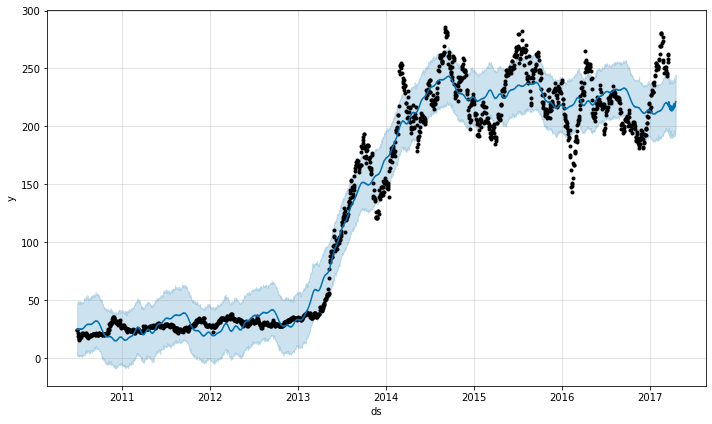

In [ ]:
figure = m.plot(forecast, xlabel='ds', ylabel="y")

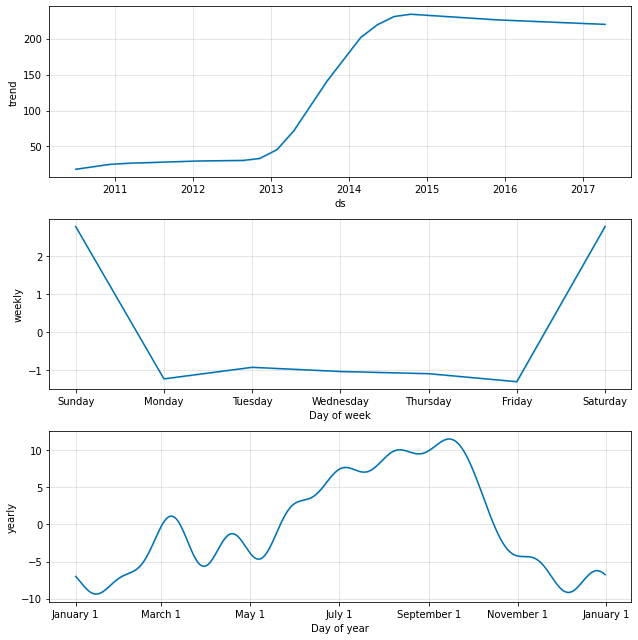

In [ ]:
figure2 = m.plot_components(forecast)

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>